# Earnings Based on College Majors

This is an excercise from [dataquest.io Exploratory Data Visualization course](https://www.dataquest.io/course/exploratory-data-visualization). The aim is to practice using matplotlib and pandas for visualizing data in jupyter notebook and to observe any correlations between college majors and median earnings.

The visualizations used in this work are quick to make and useful for a data scientist to gain the intuition about the dataset at hand, thus it is described as exploratory. If making visualizations for presenting somewhere (e.g. as an online tool) it's better to pay a bit more attention to a plot aesthetics and other tools are better suited for that than pandas or matplotlib.

The data is downloaded from [a fivethirtyeight repo - college-majors](https://github.com/fivethirtyeight/data/tree/master/college-majors)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
recent_grads = pd.read_csv('recent-grads.csv')
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [3]:
# drop rows with null values
recent_grads.dropna(inplace=True)
recent_grads.reset_index(inplace=True)

## Do students in more popular majors make more money?

To answer this question let's create a scatter plot with total number of people with the major (`Total`) on x axis and the median salary (`Median`) on the y axis. If the answer to the quesion is 'yes' we should see at least a slight positive correlation in the chart.

In [4]:
# only compare majors with large sample size 
large_sample_majors = recent_grads[recent_grads['Sample_size'] > 100]

<AxesSubplot:title={'center':'Median salary over total major graduates'}, xlabel='Total', ylabel='Median'>

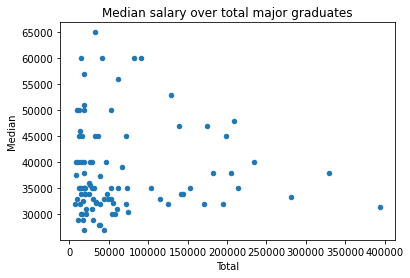

In [68]:
large_sample_majors.plot(
    x='Total',
    y='Median',
    title='Median salary over total major graduates',
    kind='scatter'
)

There is no correlation and definitely not a positive one, so the answer is **'no'**.

## Do students that majored in subjects that were majority female make more money?

To visualize the answer to this question we can compare the histograms of earnings of predominantly male and predominantly female major graduates.

In [6]:
female_majors = large_sample_majors[large_sample_majors['ShareWomen'] > 0.5]
male_majors = large_sample_majors[large_sample_majors['ShareWomen'] < 0.5]

<AxesSubplot:ylabel='Frequency'>

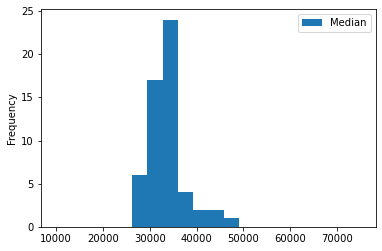

In [9]:
female_majors.plot(y='Median', kind='hist', bins=20, range=(10000,75000))

<AxesSubplot:ylabel='Frequency'>

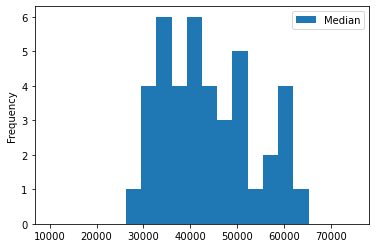

In [10]:
male_majors.plot(y='Median', kind='hist', bins=20, range=(10000,75000))

We can see that the opposite is true - students that majored in subjects that were majority **male** make more money.

## Is there any link between the number of full-time employees and median salary?

Here we can again use the scatter plot and look for any sign of correlation. Just to be consistent let's make `Median` salary be on the `y` axis and the number of full-time employees (`Full_time_year_round`) can go to `x` axis then.

<AxesSubplot:xlabel='Full_time_year_round', ylabel='Median'>

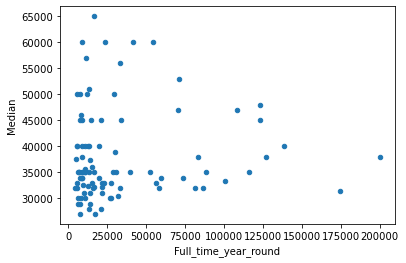

In [63]:
large_sample_majors.plot(
    x='Full_time_year_round',
    y='Median',
    kind='scatter',
)

Looks like no correlation is there, but the data is clustered around low-salary / few-full-time-employees corner.

## How many majors are primarily female?

We can use a historam to visualize this looking at the `ShareWomen` column. If there are more majors that have more female students we should see the distribution tilted to the right (or to the left otherwise). This kind of visualization may be flawed because we do not pay attention to how popular those majors are only on the number of the majors at all.

<AxesSubplot:ylabel='Frequency'>

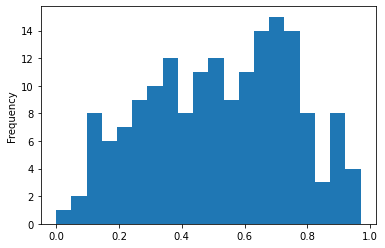

In [17]:
recent_grads['ShareWomen'].plot(bins=20, kind='hist')

In [18]:
# to check if the intuition about there are more female graduates than male 
# we can just check the numbers
recent_grads['Women'].sum()

3895228.0

In [19]:
recent_grads['Men'].sum()

2876426.0

This intuition seemed correct - there are more female graduates than male in total.

In [51]:
recent_grads['Women'].sum() / recent_grads['Men'].sum()

1.3541902346870736

In [54]:
# To round up on female vs male counts let's compare men and women by category

gender_by_category = recent_grads[['Women', 'Men', 'Major_category']].groupby('Major_category').sum()
gender_by_category.head()

,Women,Men
Major_category,,
Agriculture & Natural Resources,35263.0,40357.0
Arts,222740.0,134390.0
Biology & Life Science,268943.0,184919.0
Business,634524.0,667852.0
Communications & Journalism,260680.0,131921.0


<AxesSubplot:xlabel='Major_category'>

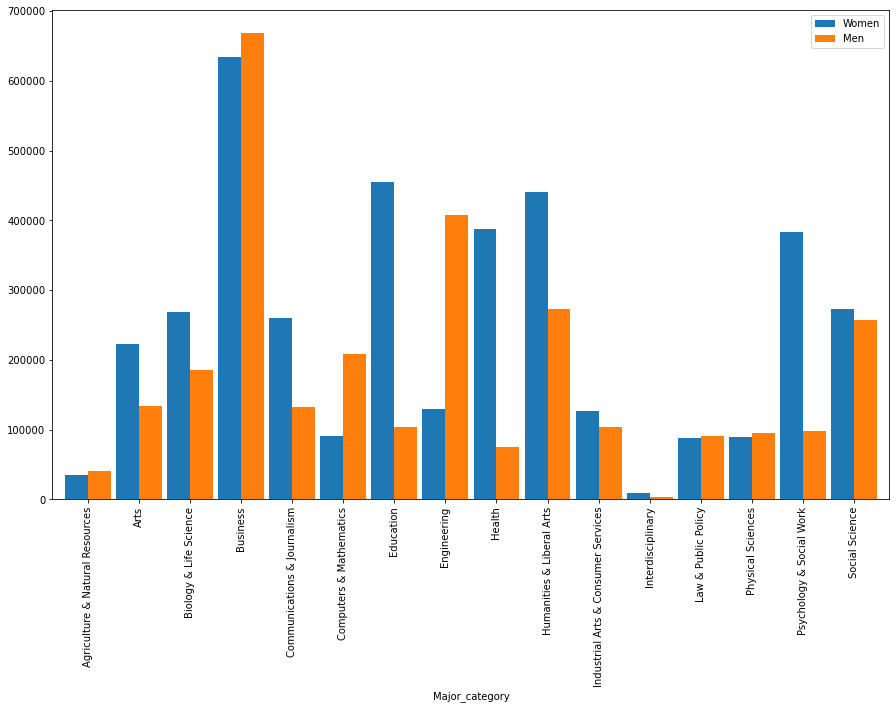

In [59]:
gender_by_category.plot(kind='bar', width=0.9, figsize=(15, 9))

In [21]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='Sample_size', ylabel='Sample_size'>,
        <AxesSubplot:xlabel='Median', ylabel='Sample_size'>],
       [<AxesSubplot:xlabel='Sample_size', ylabel='Median'>,
        <AxesSubplot:xlabel='Median', ylabel='Median'>]], dtype=object)

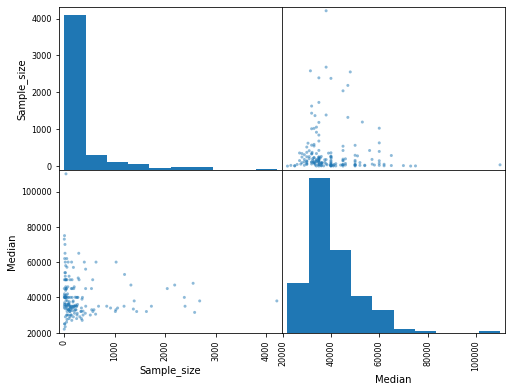

In [33]:
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(8, 6))

array([[<AxesSubplot:xlabel='Sample_size', ylabel='Sample_size'>,
        <AxesSubplot:xlabel='Median', ylabel='Sample_size'>,
        <AxesSubplot:xlabel='Unemployment_rate', ylabel='Sample_size'>],
       [<AxesSubplot:xlabel='Sample_size', ylabel='Median'>,
        <AxesSubplot:xlabel='Median', ylabel='Median'>,
        <AxesSubplot:xlabel='Unemployment_rate', ylabel='Median'>],
       [<AxesSubplot:xlabel='Sample_size', ylabel='Unemployment_rate'>,
        <AxesSubplot:xlabel='Median', ylabel='Unemployment_rate'>,
        <AxesSubplot:xlabel='Unemployment_rate', ylabel='Unemployment_rate'>]],
      dtype=object)

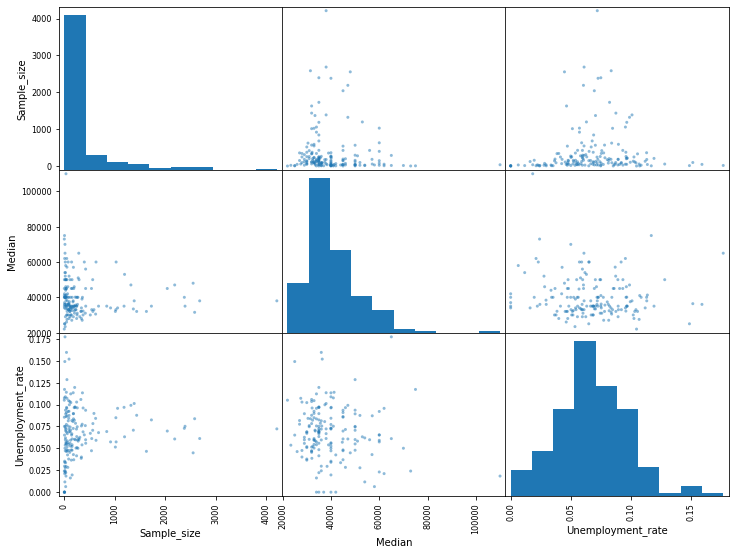

In [31]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(12, 9))

## What is the relationship between share women and median salary?

To visualize the answer to this question we can recall that the data is already sorted in ascending order by rank by median earnings and just look if there is any trend there when we look at the `ShareWomen` column.

<AxesSubplot:xlabel='Major'>

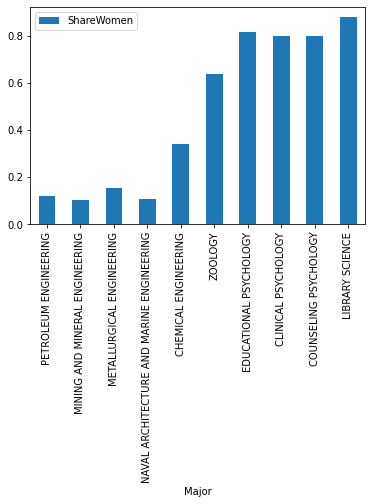

In [48]:
# first and last (by rank) few majors and their share of women
recent_grads.iloc[[0, 1, 2, 3, 4, -5, -4, -3, -2, -1]].plot.bar(x='Major', y='ShareWomen')

<AxesSubplot:>

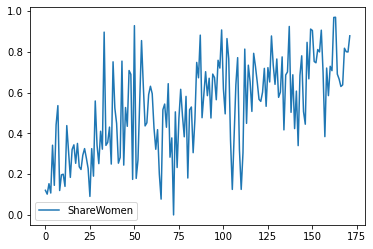

In [39]:
recent_grads.plot.line(y='ShareWomen')

There is a clear correlation appearing - the more share women the less is the median salary.

<AxesSubplot:xlabel='Major'>

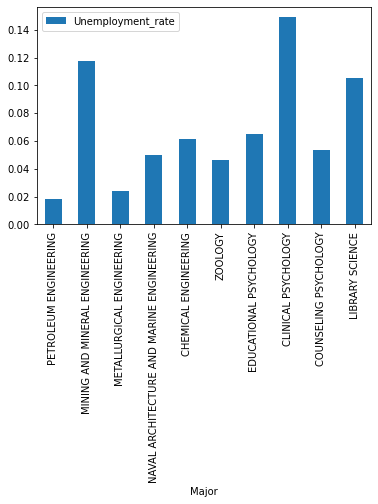

In [49]:
# 

recent_grads.iloc[[0, 1, 2, 3, 4, -5, -4, -3, -2, -1]].plot.bar(x='Major', y='Unemployment_rate')

<AxesSubplot:>

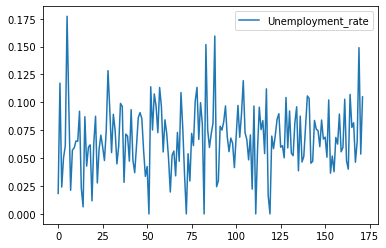

In [50]:
recent_grads.plot.line(y='Unemployment_rate')

There is no such clear correlation with the unemployment rate however.